# Student Performance in Exams

Dataset sourced from kaggle:

https://www.kaggle.com/spscientist/students-performance-in-exams

Dataset provides a good opportunity to practice data visualisation. Some visualisation methods are my own, some are inspired by this analysis: https://public.tableau.com/profile/yakov.gavrilov#!/vizhome/JacobGavrilovStudentDataAnalysis/Story1?publish=yes - the 2nd graphical representation was fun to recreate using Matplotlib/Seaborn, and I learnt a good deal from this whole exercise.

### Importing necessary libraries and initial exploration of dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette(sns.diverging_palette(10, 220, n=2))

In [2]:
perf = pd.read_csv('StudentsPerformance.csv')
perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
perf.shape
#8 features, 8,000 observations

(1000, 8)

In [4]:
#Our first 5 features are categorical - how many classes does each contain?
for i in perf.columns[0:5]:
    print(f"{len(perf[i].unique())} - {perf[i].unique()}")

2 - ['female' 'male']
5 - ['group B' 'group C' 'group A' 'group D' 'group E']
6 - ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
2 - ['standard' 'free/reduced']
2 - ['none' 'completed']


## We can use these 5 features to explore how their relationship with test scores. The questions I will investigate:

#### 1) What difference is there between genders for math and literacy scores?

#### 2) What is the difference in test scores between the 5 ethnic groups? What impact does their lunch type have on their performance?

#### 3) What effect does the parental level of education and test preparation have on test score?

#### 4) Is there a relationship between race/ethnicity and the parental level of education?

#### 5) Is there a relationship between the parental level of education and lunch type, and race/ethnicity and lunch type?

##### First, I need to neaten up the text for our categorical features to improve the data visualisations and combine the reading/writing scores in to a single value to allow for 2D graphing in our first question. I will also create a mean test score column to provide an overall figure for student performance to be used in later analysis.

In [5]:
#Capitalising all the strings for neat data presentation
perf.iloc[:,0:5] = perf.iloc[:,0:5].applymap(lambda x: x.title())
perf.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Female,Group B,Bachelor'S Degree,Standard,None,72,72,74
1,Female,Group C,Some College,Standard,Completed,69,90,88


In [6]:
#need to amend capitalised 'S
perf['parental level of education'] = perf['parental level of education'].apply(lambda x: x.replace("'S","'s"))
perf.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Female,Group B,Bachelor's Degree,Standard,None,72,72,74
1,Female,Group C,Some College,Standard,Completed,69,90,88


In [7]:
#Combining reading and writing score together to create a single score for literary proficiency. This allows for 2D graphing of mathematics vs literacy.
perf['literacy score'] = np.mean(perf[['reading score','writing score']],axis=1)
perf.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,literacy score
0,Female,Group B,Bachelor's Degree,Standard,None,72,72,74,73.0
1,Female,Group C,Some College,Standard,Completed,69,90,88,89.0


In [8]:
#Creating the combined test score column for use in later analysis.
perf['mean score'] = np.round(np.mean(perf[['math score','reading score','writing score']],axis=1),2)
perf.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,literacy score,mean score
0,Female,Group B,Bachelor's Degree,Standard,None,72,72,74,73.0,72.67
1,Female,Group C,Some College,Standard,Completed,69,90,88,89.0,82.33
2,Female,Group B,Master's Degree,Standard,None,90,95,93,94.0,92.67


### 1) What difference is there between genders for math and literacy scores?

Text(0.5,19.8,'Maths Score')

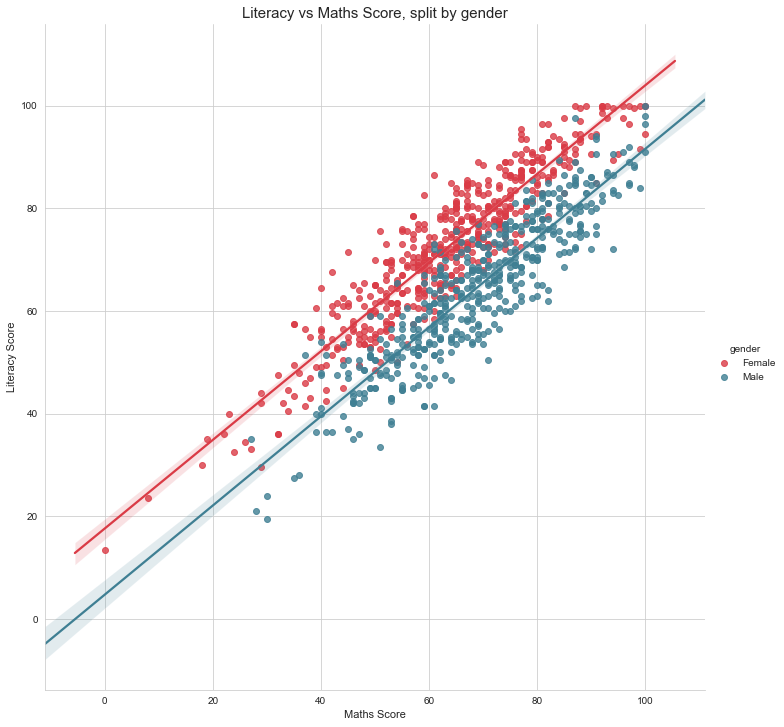

In [9]:
#Creating a scatter plot of literacy vs maths, linear regression line fit and results split by gender
sns.lmplot(x='math score',y='literacy score',hue='gender',data=perf,height=10)
plt.title('Literacy vs Maths Score, split by gender',fontsize=15)
plt.ylabel('Literacy Score',fontsize=11)
plt.xlabel('Maths Score',fontsize=11)

### 2) What is the difference in test scores between the 5 ethnic groups? What impact does their lunch type have on their performance?

In [10]:
#Creating a dataframe to group by 3 orders; gender, ethnic group, and lunch type. Mean of test performance scores calculated from grouped values.
lunch = perf[['gender','race/ethnicity','math score','literacy score','mean score','lunch']].groupby(by=['gender','race/ethnicity','lunch'],as_index=False).mean()

In [11]:
#Checking head of df to view grouping
lunch.head(3)

,gender,race/ethnicity,lunch,math score,literacy score,mean score
0,Female,Group A,Free/Reduced,49.928571,59.678571,56.427143
1,Female,Group A,Standard,64.000000,74.000000,70.666818
2,Female,Group B,Free/Reduced,56.512821,68.192308,64.299231


In [12]:
#Checking tail of df to view grouping
lunch.tail(3)

,gender,race/ethnicity,lunch,math score,literacy score,mean score
17,Male,Group D,Standard,71.752809,67.488764,68.909888
18,Male,Group E,Free/Reduced,73.277778,68.000000,69.758889
19,Male,Group E,Standard,77.924528,69.132075,72.062642


In [13]:
#Creating a dataframe to group by gender and ethnic group only. This allows us to see the mean value for that sub-group and thus how far each lunch-type 
#sub-group deviates from the mean.
collapsed_lunch = perf[['gender','race/ethnicity','math score','literacy score','mean score',]].groupby(by=['gender','race/ethnicity'],as_index=False).mean()

In [14]:
collapsed_lunch.head(3)

,gender,race/ethnicity,math score,literacy score,mean score
0,Female,Group A,58.527778,68.430556,65.129167
1,Female,Group B,61.403846,70.562500,67.510000
2,Female,Group C,62.033333,71.861111,68.585222


In [15]:
#Inserting a lunch type value column so that a) the data is mapped correctly on the resulting legend and b) the tables can be concatenated together for graphing
collapsed_lunch.insert(2,'lunch','Mean Value')

In [16]:
collapsed_lunch.head(3)

,gender,race/ethnicity,lunch,math score,literacy score,mean score
0,Female,Group A,Mean Value,58.527778,68.430556,65.129167
1,Female,Group B,Mean Value,61.403846,70.562500,67.510000
2,Female,Group C,Mean Value,62.033333,71.861111,68.585222


In [17]:
#Concatinating our two dataframes together and then sorting them so all of the sub-groups are in order and the observations are correctly adjacent 
concat_lunch = pd.concat([lunch, collapsed_lunch]).sort_values(by=['gender','race/ethnicity','lunch'],axis=0)

In [18]:
concat_lunch.head(3)

,gender,race/ethnicity,lunch,math score,literacy score,mean score
0,Female,Group A,Free/Reduced,49.928571,59.678571,56.427143
0,Female,Group A,Mean Value,58.527778,68.430556,65.129167
1,Female,Group A,Standard,64.000000,74.000000,70.666818


Text(0.5,0.98,'Test Scores vs Ethnic Group, split by Lunch Type')

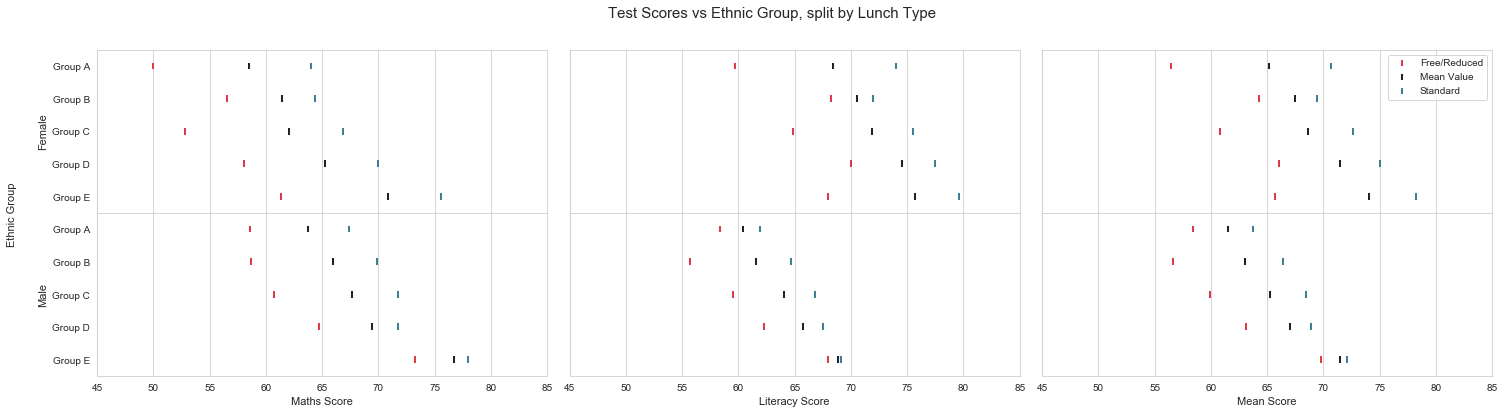

In [19]:
#Creating our data visualisation

#Creating the fig, axes data objects and setting the axes properties we want - x,y graphs share values across subplots and our vertical
#graphs are stacked directly on top of one another to improve graph readability
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True,sharey=True,figsize = (25,6),gridspec_kw={'wspace':0.05,'hspace':0})

#Standardising the axes widths
axes[1][0].set_xlim(45,85)
axes[1][1].set_xlim(45,85)
axes[1][2].set_xlim(45,85)

#Custom colour palette for this graph as the binary palette used so far is not approriate
with sns.diverging_palette(10, 220, n=3,center='dark'):

    #Maths scores, seperated by gender
    sns.pointplot(y='race/ethnicity',x='math score',hue='lunch',data=concat_lunch.iloc[:15],markers='|',join=False,ax=axes[0][0])
    sns.pointplot(y='race/ethnicity',x='math score',hue='lunch',data=concat_lunch.iloc[15:],markers='|',join=False,ax=axes[1][0])

    #Literacy scores, seperated by gender
    sns.pointplot(y='race/ethnicity',x='literacy score',hue='lunch',data=concat_lunch.iloc[:15],markers='|',join=False,ax=axes[0][1])
    sns.pointplot(y='race/ethnicity',x='literacy score',hue='lunch',data=concat_lunch.iloc[15:],markers='|',join=False,ax=axes[1][1])

    #Mean scores, seperated by gender
    sns.pointplot(y='race/ethnicity',x='mean score',hue='lunch',data=concat_lunch.iloc[:15],markers='|',join=False,ax=axes[0][2])
    sns.pointplot(y='race/ethnicity',x='mean score',hue='lunch',data=concat_lunch.iloc[15:],markers='|',join=False,ax=axes[1][2])

#Removing x labels from top set of graphs
axes[0][0].set_xlabel('')
axes[0][1].set_xlabel('')
axes[0][2].set_xlabel('')

#Setting x labels for bottom set of graphs
axes[1][0].set_xlabel('Maths Score',fontsize=11)
axes[1][1].set_xlabel('Literacy Score',fontsize=11)
axes[1][2].set_xlabel('Mean Score',fontsize=11)

#Removing y label for each inner graph
axes[0][1].set_ylabel('')
axes[0][2].set_ylabel('')
axes[1][1].set_ylabel('')
axes[1][2].set_ylabel('')

#Setting common y label for each gender
axes[0][0].set_ylabel('Female',fontsize=11)
axes[1][0].set_ylabel('Male',fontsize=11)

#Removing legends from individual plots
axes[0][0].get_legend().remove()
axes[0][1].get_legend().remove()
axes[0][2].get_legend().remove()
axes[1][0].get_legend().remove()
axes[1][1].get_legend().remove()
axes[1][2].get_legend().remove()

#Setting common legend for whole graph
handles, labels = axes[0][0].get_legend_handles_labels()      
axes[0][2].legend(handles,labels,loc='upper right')

#Setting common y label
fig.text(0.075, 0.5, 'Ethnic Group', va='center', rotation='vertical',fontsize=11)

#Setting figure title
fig.suptitle('Test Scores vs Ethnic Group, split by Lunch Type',fontsize=15)


### 3) What effect does the parental level of education and test preparation have on test score?

In [20]:
#Creating a dataframe holding only the columns we wish to analyse
edu_prep = perf[['parental level of education','test preparation course','math score','literacy score','mean score']]

In [21]:
edu_prep.head(3)

,parental level of education,test preparation course,math score,literacy score,mean score
0,Bachelor's Degree,None,72,73.0,72.67
1,Some College,Completed,69,89.0,82.33
2,Master's Degree,None,90,94.0,92.67


In [22]:
#Grouping by appropriate categories, mean of grouped values taken
g_edu_prep = edu_prep.groupby(by=['test preparation course','parental level of education'],as_index=False).mean()

In [23]:
#Dict to translate the various education levels to numerical values to then sort by
edu_dict = {'Some High School':1,'High School':2,'Some College':3,"Associate's Degree":4,"Bachelor's Degree":5,"Master's Degree":6}

In [24]:
#Creating the education level column, and then sorting by it
g_edu_prep['edu_level'] = [edu_dict[i] for i in g_edu_prep['parental level of education']]

In [25]:
g_edu_prep = g_edu_prep.sort_values(by=['test preparation course','edu_level'])

In [26]:
#Resulting table
g_edu_prep

,test preparation course,parental level of education,math score,literacy score,mean score,edu_level
5,Completed,Some High School,66.701299,70.655844,69.337273,1
2,Completed,High School,65.000000,67.946429,66.964821,2
4,Completed,Some College,71.454545,76.253247,74.653636,3
0,Completed,Associate's Degree,71.829268,76.493902,74.938780,4
1,Completed,Bachelor's Degree,73.282609,77.717391,76.239783,5
3,Completed,Master's Degree,70.600000,79.175000,76.316500,6
11,None,Some High School,61.078431,62.333333,61.914706,1
8,None,High School,60.992857,61.828571,61.550143,2
10,None,Some College,64.892617,65.479866,65.283691,3
6,None,Associate's Degree,65.571429,66.850000,66.423786,4


In [27]:
#Creating a df containing only those who did not complete the test preparation, grouped by parental level of education, taking count of values
none_edu_prep = perf[['parental level of education','test preparation course']][perf[['parental level of education','test preparation course']]['test preparation course']=='None'].groupby('parental level of education',as_index=False).count()

In [28]:
#Creating the education level column
none_edu_prep['edu_level'] = [edu_dict[i] for i in none_edu_prep['parental level of education']]

In [29]:
#Sorting the values by education level
none_edu_prep = none_edu_prep.sort_values(by='edu_level')

In [30]:
#Resulting count table, column 'test preparation course' is a count of the number of students who did not complete test prep for each parental education level
none_edu_prep

,parental level of education,test preparation course,edu_level
5,Some High School,102,1
2,High School,140,2
4,Some College,149,3
0,Associate's Degree,140,4
1,Bachelor's Degree,72,5
3,Master's Degree,39,6


In [31]:
#Creating a df containing only those who didc omplete the test preparation, grouped by parental level of education
completed_edu_prep = perf[['parental level of education','test preparation course']][perf[['parental level of education','test preparation course']]['test preparation course']=='Completed'].groupby('parental level of education',as_index=False).count()

In [32]:
#Creating the education level column
completed_edu_prep['edu_level'] = [edu_dict[i] for i in completed_edu_prep['parental level of education']]

In [33]:
#Sorting the values by education level
completed_edu_prep = completed_edu_prep.sort_values(by='edu_level')

In [34]:
#Resulting count table, column 'test preparation course' is a count of the number of students who did  complete test prep for each parental education level
completed_edu_prep

,parental level of education,test preparation course,edu_level
5,Some High School,77,1
2,High School,56,2
4,Some College,77,3
0,Associate's Degree,82,4
1,Bachelor's Degree,46,5
3,Master's Degree,20,6


In [35]:
#Creating a table of the percentage values for those who completed the test preparation
perctable1 = pd.concat([completed_edu_prep['parental level of education'],np.round(completed_edu_prep['test preparation course']/(completed_edu_prep['test preparation course']+none_edu_prep['test preparation course'])*100,2)],axis=1)
perctable1

,parental level of education,test preparation course
5,Some High School,43.02
2,High School,28.57
4,Some College,34.07
0,Associate's Degree,36.94
1,Bachelor's Degree,38.98
3,Master's Degree,33.90


In [36]:
#Turning the values in to percentages to add to the graph
perclist1 = [str(i)+'%' for i in (perctable1['test preparation course'].values)]
perclist1

['43.02%', '28.57%', '34.07%', '36.94%', '38.98%', '33.9%']

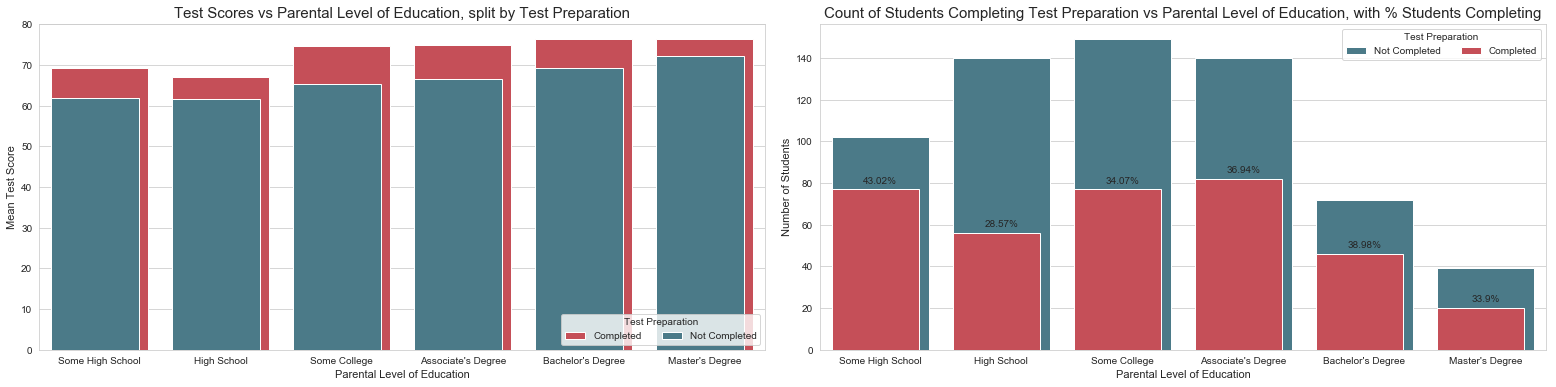

In [37]:
#Creating our two data visualisations. Left graph demonstrates the difference in test scores between between the different levels of parental education,
#split by those who did and did not complete the test preparation. Right graph plots the count of students who did and did not complete the test
#preparation for each level of parental education.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (27,6),gridspec_kw={'wspace':0.075})

#Plotting the data for left hand graph
sns.barplot(x="parental level of education", y="mean score", data=g_edu_prep.iloc[:6],label='Completed',ax=axes[0],color=(0.85104086, 0.23436275, 0.27960104))
lhp2 = sns.barplot(x="parental level of education", y="mean score", data=g_edu_prep.iloc[6:],label='Not Completed',ax=axes[0],color=(0.25199714, 0.49873371, 0.57516028))

#Adding graph details
axes[0].legend(ncol=2, loc="lower right",title='Test Preparation', frameon=True)
axes[0].set_title('Test Scores vs Parental Level of Education, split by Test Preparation',fontsize=15)
axes[0].set_xlabel('Parental Level of Education',fontsize=11)
axes[0].set_ylabel('Mean Test Score',fontsize=11)

#Shrinking the top plots to improve data interpretability
for p in lhp2.patches[6:]:
    p.set_width(0.72)

#Plotting the data
sns.barplot(x="parental level of education", y="test preparation course", data=none_edu_prep,label='Not Completed',ax=axes[1],color=(0.25199714, 0.49873371, 0.57516028))
rhp2 = sns.barplot(x="parental level of education", y="test preparation course", data=completed_edu_prep,label='Completed',ax=axes[1],color=(0.85104086, 0.23436275, 0.27960104))

#Adding graph details
axes[1].legend(ncol=2, loc="upper right",title='Test Preparation', frameon=True)
axes[1].set_title('Count of Students Completing Test Preparation vs Parental Level of Education, with % Students Completing',fontsize=15)
axes[1].set_xlabel('Parental Level of Education',fontsize=11)
axes[1].set_ylabel('Number of Students',fontsize=11)

i = -1
#Adding percentage values on to graph and shrinking top plots
for p in rhp2.patches[6:]:
    i += 1 
    height = p.get_height()
    rhp2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            perclist1[i],
            ha="center")
    p.set_width(0.72)

### 4) Is there a relationship between race/ethnicity and the parental level of education?

#### For this investigation I will normalise the group population sizes to determine accurate % group representation values.

In [38]:
#Creating our dataframe to count the level of parental education for each different ethnic group
eth_edu = perf[['race/ethnicity','parental level of education','mean score']].groupby(['race/ethnicity','parental level of education'],as_index=True).count()

In [39]:
#Converting to a matrix to then normalise population sizes
eth_edu = eth_edu.unstack()
eth_edu.columns = eth_edu.columns.droplevel()
eth_edu.head(2)

parental level of education,Associate's Degree,Bachelor's Degree,High School,Master's Degree,Some College,Some High School
race/ethnicity,,,,,,
Group A,14,12,18,3,18,24
Group B,41,20,48,6,37,38


In [40]:
#Normalising population sizes
eth_edu = eth_edu.apply(lambda x: x/eth_edu.sum(),axis=1)
eth_edu.head(2)

parental level of education,Associate's Degree,Bachelor's Degree,High School,Master's Degree,Some College,Some High School
race/ethnicity,,,,,,
Group A,0.063063,0.101695,0.091837,0.050847,0.079646,0.134078
Group B,0.184685,0.169492,0.244898,0.101695,0.163717,0.212291


In [41]:
#Calculating % representation each ethnic group has for each parental level of education
eth_edu = eth_edu.apply(lambda x: np.round(x*100/eth_edu.sum(axis=1),2))
#Re-organising the columns from most-least education
eth_edu = eth_edu[['Some High School','High School','Some College',"Associate's Degree","Bachelor's Degree","Master's Degree"]]
eth_edu.head(2)

parental level of education,Some High School,High School,Some College,Associate's Degree,Bachelor's Degree,Master's Degree
race/ethnicity,,,,,,
Group A,25.73,17.62,15.28,12.10,19.51,9.76
Group B,19.72,22.74,15.20,17.15,15.74,9.44


In [63]:
eth_edu.stack().reset_index().to_csv('StuPerfQues3.csv')

In [ ]:
.to_csv('StuPerfQues3.csv')

Text(88,0.5,'Ethnic Group')

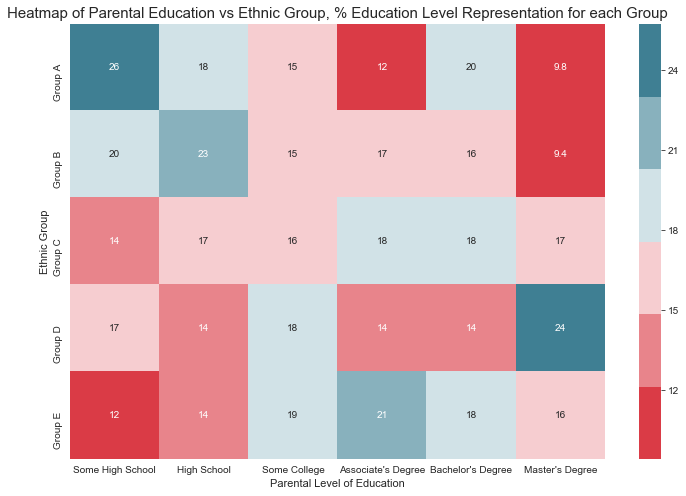

In [42]:
fig, axes = plt.subplots(figsize=(12, 8))
#Creating heatmap
sns.heatmap(eth_edu,annot=True,ax=axes,cmap=(sns.diverging_palette(10, 220, n=6,center='light')))

#Adding graph details
axes.set_title('Heatmap of Parental Education vs Ethnic Group, % Education Level Representation for each Group',fontsize=15)
axes.set_xlabel('Parental Level of Education',fontsize=11)
axes.set_ylabel('Ethnic Group',fontsize=11)

### 5) Is there a relationship between the parental level of education and lunch type, and race/ethnicity and lunch type?

##### Preparing the data for parental education level vs lunch type analysis

In [43]:
#Grouping lunch type by parental level of education, counting the number of observations
edu_lu = perf[['parental level of education','lunch','mean score']].groupby(['parental level of education','lunch'],as_index=False).count()
edu_lu.head(3)

,parental level of education,lunch,mean score
0,Associate's Degree,Free/Reduced,77
1,Associate's Degree,Standard,145
2,Bachelor's Degree,Free/Reduced,44


In [44]:
#Creating the education level column...
edu_lu['edu_level'] = [edu_dict[i] for i in edu_lu['parental level of education']]
edu_lu.head(3)

,parental level of education,lunch,mean score,edu_level
0,Associate's Degree,Free/Reduced,77,4
1,Associate's Degree,Standard,145,4
2,Bachelor's Degree,Free/Reduced,44,5


In [45]:
#...and then sorting by it
edu_lu.sort_values(['edu_level','lunch'],inplace=True)
edu_lu.head(3)

,parental level of education,lunch,mean score,edu_level
10,Some High School,Free/Reduced,61,1
11,Some High School,Standard,118,1
4,High School,Free/Reduced,70,2


In [46]:
#Preparing the table for the join operation
edu_lu = edu_lu.set_index(['parental level of education','lunch']).drop('edu_level',axis=1)
edu_lu.head(3)

mean score
parental level of education lunch                   
Some High School            Free/Reduced          61
                            Standard             118
High School                 Free/Reduced          70

In [47]:
#Joining the table to one counting the sum of the observations for each education group
edu_lu = edu_lu.join(perf[['parental level of education','mean score']].groupby(['parental level of education'],as_index=True).count(),on='parental level of education',rsuffix=' sum')
edu_lu.head(3)

mean score  mean score sum
parental level of education lunch                                   
Some High School            Free/Reduced          61             179
                            Standard             118             179
High School                 Free/Reduced          70             196

In [48]:
#Calculating a percentage value that each lunch type represents for its ethnic group
edu_lu['perc'] = np.round(edu_lu['mean score']*100/edu_lu['mean score sum'],2)
edu_lu.columns=['count','sum count','perc']
edu_lu.head(3)

count  sum count   perc
parental level of education lunch                                
Some High School            Free/Reduced     61        179  34.08
                            Standard        118        179  65.92
High School                 Free/Reduced     70        196  35.71

In [49]:
#Creating a list of only the precentage values for Free/Reduced to be called upon later
perclist2 = [str(i)+'%' for i in (edu_lu.reset_index()[edu_lu.reset_index()['lunch']=='Free/Reduced']['perc'].values)]
perclist2

['34.08%', '35.71%', '34.96%', '34.68%', '37.29%', '40.68%']

##### Preparing the data for ethnic group vs lunch type analysis

In [50]:
#Grouping lunch type by ethnic group, counting the number of observations
eth_lu = perf[['race/ethnicity','lunch','mean score']].groupby(['race/ethnicity','lunch'],as_index=True).count()
eth_lu.head(3)

mean score
race/ethnicity lunch                   
Group A        Free/Reduced          36
               Standard              53
Group B        Free/Reduced          69

In [51]:
#Joining the table to one counting the sum of the observations for each ethnic group
eth_lu = eth_lu.join(perf[['race/ethnicity','mean score']].groupby(['race/ethnicity'],as_index=True).count(),on='race/ethnicity',rsuffix=' sum')
eth_lu.head(3)

mean score  mean score sum
race/ethnicity lunch                                   
Group A        Free/Reduced          36              89
               Standard              53              89
Group B        Free/Reduced          69             190

In [52]:
#Calculating a percentage value that each lunch type represents for its ethnic group
eth_lu['perc'] = np.round(eth_lu['mean score']*100/eth_lu['mean score sum'],2)
eth_lu.columns=['count','sum count','perc']
eth_lu.head(3)

count  sum count   perc
race/ethnicity lunch                                
Group A        Free/Reduced     36         89  40.45
               Standard         53         89  59.55
Group B        Free/Reduced     69        190  36.32

In [53]:
#Creating a list of only the precentage values for Free/Reduced to be called upon later
perclist3 = [str(i)+'%' for i in (eth_lu.reset_index()[eth_lu.reset_index()['lunch']=='Free/Reduced']['perc'].values)]
perclist3

['40.45%', '36.32%', '35.74%', '36.26%', '29.29%']

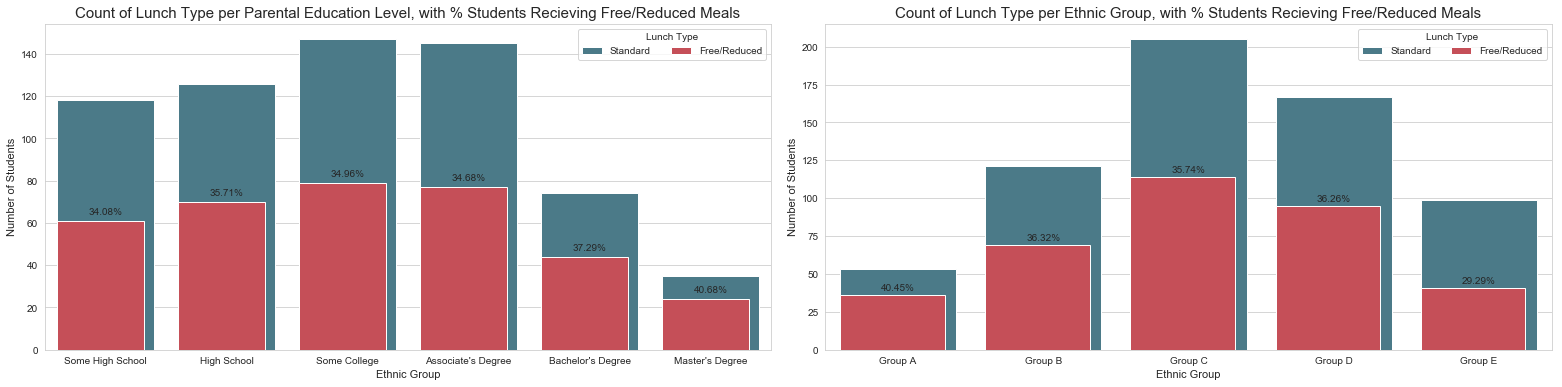

In [54]:
#Creating our two data visualisations. Left graph plots the count of lunch types per parent education level, with % of students receiving free/reduced
#meals for each education level. Right graph plots the count of lunch types per ethnic group, with % of students receiving free/reduced meals for each
#ethnic group.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (27,6),gridspec_kw={'wspace':0.075})

#Plotting the data for left hand graph
sns.barplot(x="parental level of education", y="count", data=edu_lu.reset_index()[edu_lu.reset_index()['lunch']=='Standard'],label='Standard',ax=axes[0],color=(0.25199714, 0.49873371, 0.57516028))
lhp2 = sns.barplot(x="parental level of education", y="count", data=edu_lu.reset_index()[edu_lu.reset_index()['lunch']=='Free/Reduced'],label='Free/Reduced',ax=axes[0],color=(0.85104086, 0.23436275, 0.27960104))

#Adding graph details
axes[0].legend(ncol=2, loc="upper right",title='Lunch Type', frameon=True)
axes[0].set_title('Count of Lunch Type per Parental Education Level, with % Students Recieving Free/Reduced Meals',fontsize=15)
axes[0].set_xlabel('Parental Education Level',fontsize=11)
axes[0].set_ylabel('Number of Students',fontsize=11)

#Adding percentage values on to graph and shrinking top plots
i = -1
for p in lhp2.patches[6:]:
    i += 1 
    height = p.get_height()
    lhp2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            perclist2[i],
            ha="center")
    p.set_width(0.72)

#Plotting the data for right hand graph
sns.barplot(x="race/ethnicity", y="count", data=eth_lu.reset_index()[eth_lu.reset_index()['lunch']=='Standard'],label='Standard',ax=axes[1],color=(0.25199714, 0.49873371, 0.57516028))
rhp2 = sns.barplot(x="race/ethnicity", y="count", data=eth_lu.reset_index()[eth_lu.reset_index()['lunch']=='Free/Reduced'],label='Free/Reduced',ax=axes[1],color=(0.85104086, 0.23436275, 0.27960104))

#Adding graph details
axes[1].legend(ncol=2, loc="upper right",title='Lunch Type', frameon=True)
axes[1].set_title('Count of Lunch Type per Ethnic Group, with % Students Recieving Free/Reduced Meals',fontsize=15)
axes[1].set_xlabel('Ethnic Group',fontsize=11)
axes[1].set_ylabel('Number of Students',fontsize=11)

#Adding percentage values on to graph and shrinking top plots
i = -1
for p in rhp2.patches[5:]:
    i += 1 
    height = p.get_height()
    rhp2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            perclist3[i],
            ha="center")
    p.set_width(0.72)